In [ ]:
# Fill in your name using the format below and student ID number
your_name = "Creemers, Stef"
student_id = "0962484"

In [ ]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

     |████████████████████████████████| 163kB 3.3MB/s eta 0:00:01


In [4]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" #disable GPU usage when running locally (was not installed correctly)
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Stef, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [ ]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
# base_dir = '/content/drive/My Drive/assignment-3-stefcreemers'
base_dir = './'

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [ ]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [ ]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [ ]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [ ]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

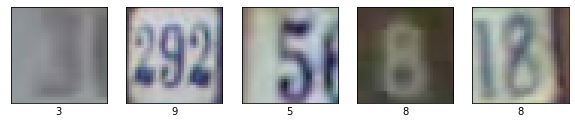

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model, model_from_json # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
      base_dir -- Directory where the models are stored
      name -- Name of the model, e.g. 'question_1_1'
      extension -- the file extension
    """
    try:
      # if a json description is available, load config and then weights
      if os.path.isfile(os.path.join(base_dir, name+'.json')):
        json_file = open(os.path.join(base_dir, name+'.json'), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights(os.path.join(base_dir, name+extension))
      # else just load the entire model from hdf5 file
      else:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
      shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
      return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
      model -- the model to be saved
      base_dir -- Directory where the models should be stored
      name -- Name of the model, e.g. 'question_1_1'
      extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
      print("Model larger than 100MB, storing weights only.")
      model.save_weights(path)
      model_json = model.to_json()
      with open(os.path.join(base_dir, name+".json"), "w") as json_file:
          json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.364304  0.183794  0

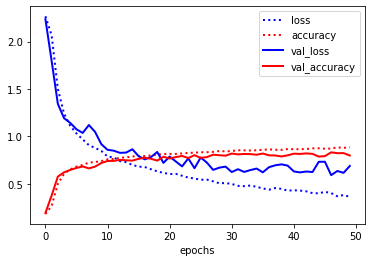

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  optimizer = optimizers.Adam()
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=512)

answer_q_1_1 = """3 hidden layers were used, starting with 512 nodes, in order to balance dropping information and overfitting the training
data. I used ReLu (fast computation), Softmax for last layer and cross entropy loss (both suitable for multiclass classification). 
I use Adam optimizer since its recommended by literature and it gives quite nice convergence. The model starts overfitting 
after 30 epochs. Smaller batchsize decreased learning speed. Performance is good given no preprocessing or regularization."""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [ ]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

def global_contrast_norm(X, s, lambda_param, epsilon):

    X = X - np.mean(X)
    contrast = np.sqrt(lambda_param + np.mean(X**2))

    return s * X / max(contrast, epsilon)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 690,314
Trainable params: 690,314
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.080109  0.461995  0.518

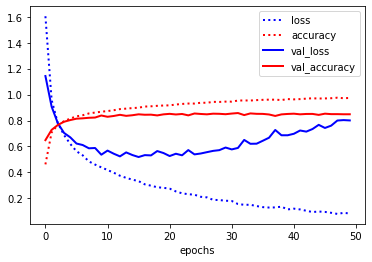

In [28]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

# Replace with the preprocessed data
preprocessed_split = global_contrast_norm(rgb2gray(X_train),1, 20, 0.00000001), global_contrast_norm(rgb2gray(X_val),1, 20, 0.00000001), y_train, y_val

# # Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  optimizer = optimizers.Adam()
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=512)

answer_q_1_2 = """Greyscale conversion leads to slight decrease in validation
accuracy (~1%), due to loss of some information. However, high increase in
runtime is achieved. The model starts to overfit after 25 epochs (val_loss increases).
Global contrast normalization with s=1, lambda=20 and epsilon=0.00000001 is used
to prevent images from having different levels of contrast. It substracts the
mean from each image value and scales it by the contrast level.
This leads to a ~2% increase in validation accuracy."""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_81 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_82 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_83 (Dropout)

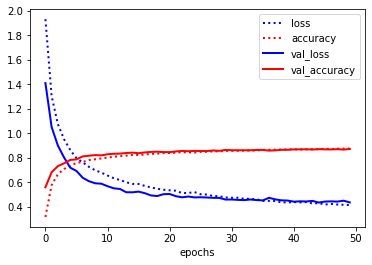

In [29]:
from tensorflow.keras import regularizers

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(512, activation='relu'))
  # model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(256, activation='relu'))
  # model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(128, activation='relu'))
  # model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  
  optimizer = optimizers.Adam()
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=512)

answer_q_1_3 = """ L2 regularization makes the model more resistent to overfitting.
Dropout with an increasing amount of dropout throughout the layers leads to
more regularization deeper in the model compared to closer to the
input layer. Dropout leads to slightly better accuracy (~1%) and
model overfits more slowly. Batch normalization, both with and without dropout,
did not lead to additional win in validation accuracy or prevention of overfitting.
A plateau is reached after 20 epochs."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)    

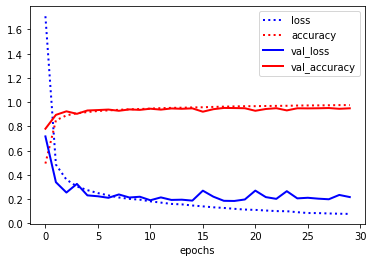

In [31]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=30, batch_size=128)

answer_q_2_1 = """A VGG-like structure with 4 blocks of 2 conv. layers and a dense layer of width 1024 was used. The conv. layers width starts at 32 and is doubled for each block. Less conv. blocks or 3 layers per block instead of 2 didn't improve performance. Zero-padding is used to prevent loosing information at the borders. Spatial pooling is done using 4 max-pool layers, to prevent overfitting and reduce the number of weights to be learned. ReLu Erasing, as suggested by literature, did not improve performance. Batch normalization and dropout were used to prevent overfitting. Adam outperformed RMSprop, SGD and Adagrad in learning speed and/or smoothness. Accuracy converges nicely, but still little erratic. After 15 epochs, the model starts overfitting. We achieve a good performance (95.3%)."""
print("Answer is {} characters long".format(len(answer_q_2_1))) 

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [ ]:
# Implementation: Copyright (c) 2017 Yusuke Uchida (https://github.com/yu4u/cutout-random-erasing)
# Z. Zhong, L. Zheng, G. Kang, S. Li, and Y. Yang, "Random Erasing Data Augmentation," in arXiv:1708.04896, 2017.

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)   

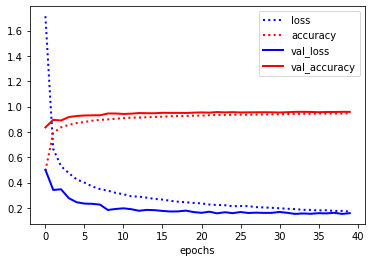

In [37]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    shear_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    preprocessing_function=get_random_eraser(p=0.1, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=True),
    fill_mode='nearest')

batch_size = 32
augmented_split = data_generator.flow(preprocessed_split[0], y_train, batch_size=batch_size), preprocessed_split[1], y_val

steps = int(preprocessed_split[0].shape[0] / batch_size)
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator = True, epochs=40, batch_size=None, steps_per_epoch=steps)

answer_q_2_2 = """A minor performance improvement was achieved using random erasing with probability 0.1. It randomly selects a rectangle region and replaces its pixels with random values, making the model more robust to occlusion. This combined with ShearX/Y up to 0.1 degrees and rotation up to 10 degrees, lead to the best possible improvement found. Other techniques tried with various parameters, not leading to any notable improvement: width shift, height shift and zooming. At 10 epochs a plateau is reached."""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

Test accuracy: 0.9582536005640044


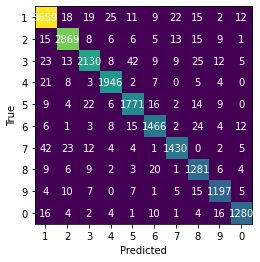

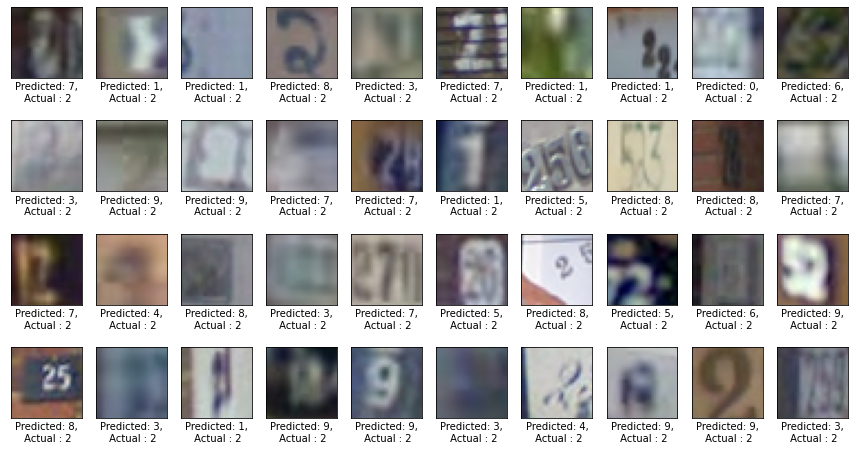

Answer is 794 characters long


In [41]:
from sklearn.metrics import confusion_matrix
import math
  
model = load_model_from_file(base_dir, 'model_2_2')
y_pred = model.predict(global_contrast_norm(rgb2gray(X_test),1, 20, 0.00000001))
test_accuracy_3_1 = len(np.nonzero(np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1))[0])/len(y_pred)
print("Test accuracy: " + str(test_accuracy_3_1))

classes = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "0"}

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(list(classes.values()))
  ax.set_yticklabels(list(classes.values()))
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

plot_confusion_matrix()

def plot_misclassifications():
  class_of_interest = 2
  misclassified_samples = np.nonzero((np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1)) & (np.argmax(y_test, axis=1) == 1))[0]
  number_of_rows = 4
  images_per_row = 10
  fig, axes = plt.subplots(number_of_rows, images_per_row,  figsize=(15, 8))
  for nr, i in enumerate(misclassified_samples[:number_of_rows*images_per_row]):
      index = int(math.floor(nr/images_per_row)),int(np.mod(nr,images_per_row))
      axes[index].imshow(X_test[i])
      axes[index].set_xlabel("Predicted: %s,\n Actual : %s" % (classes[np.argmax(y_pred[i])+1],classes[np.argmax(y_test[i])+1]))
      axes[index].set_xticks(()), axes[index].set_yticks(())

  plt.show();

plot_misclassifications()

answer_q_3_1 = """The confusion matrix shows us that 5 and 3, and 7 and 1 are often confused. It is important to note that these conclusions are based on absolute figures and that the dataset is imbalanced. 1 is in general most often confused, but also the most occurring class.
40 random wrongly predicted samples with actual class 2 were visualized. Often an error is made when multiple digits are present in the image, making it more difficult for random erasing to correct these images. In some cases the actual digit is not centered in the middle. Many other mistakes are related to wrong actual labels or images which are really vague, where detecting a digit visually is already very hard. This makes the test accuracy (~95.8%) satisfactory, despite some papers in literature achieve 98% to 99% accuracy.
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


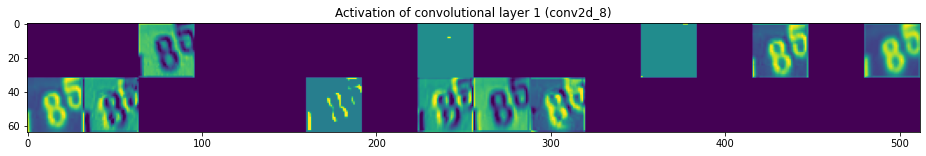

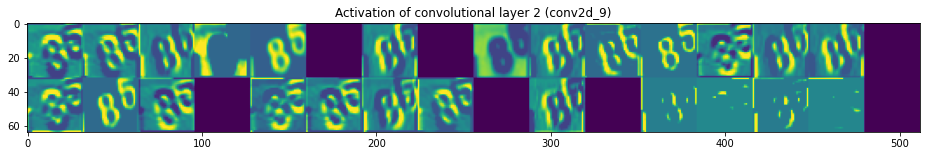

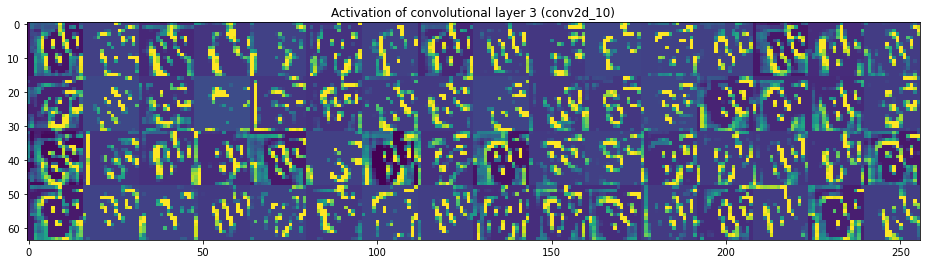

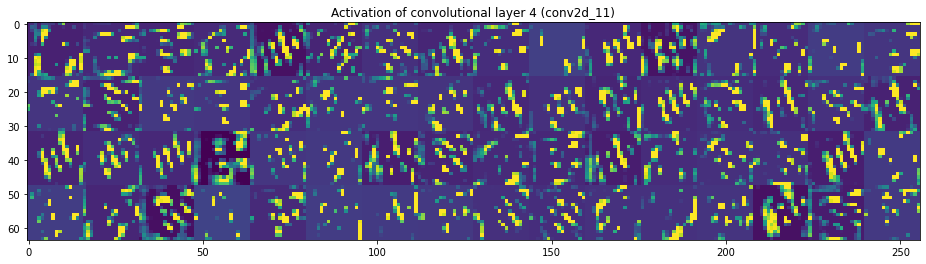

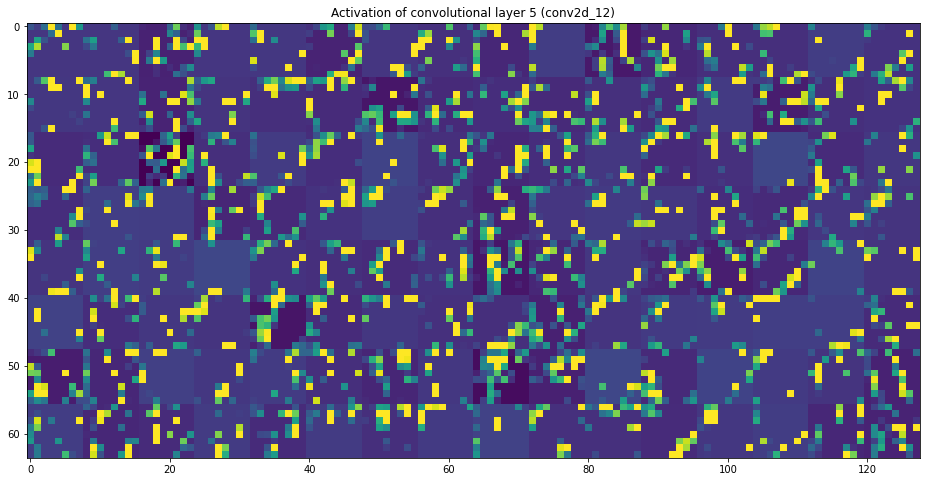

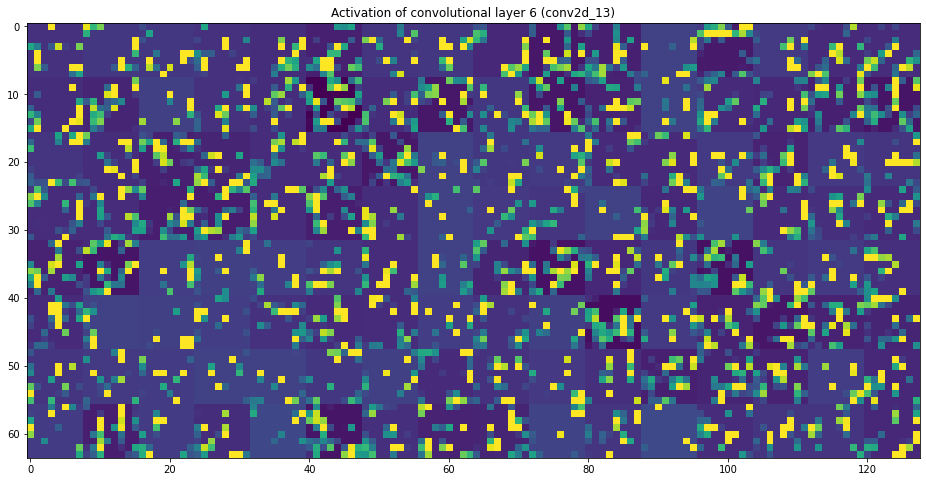

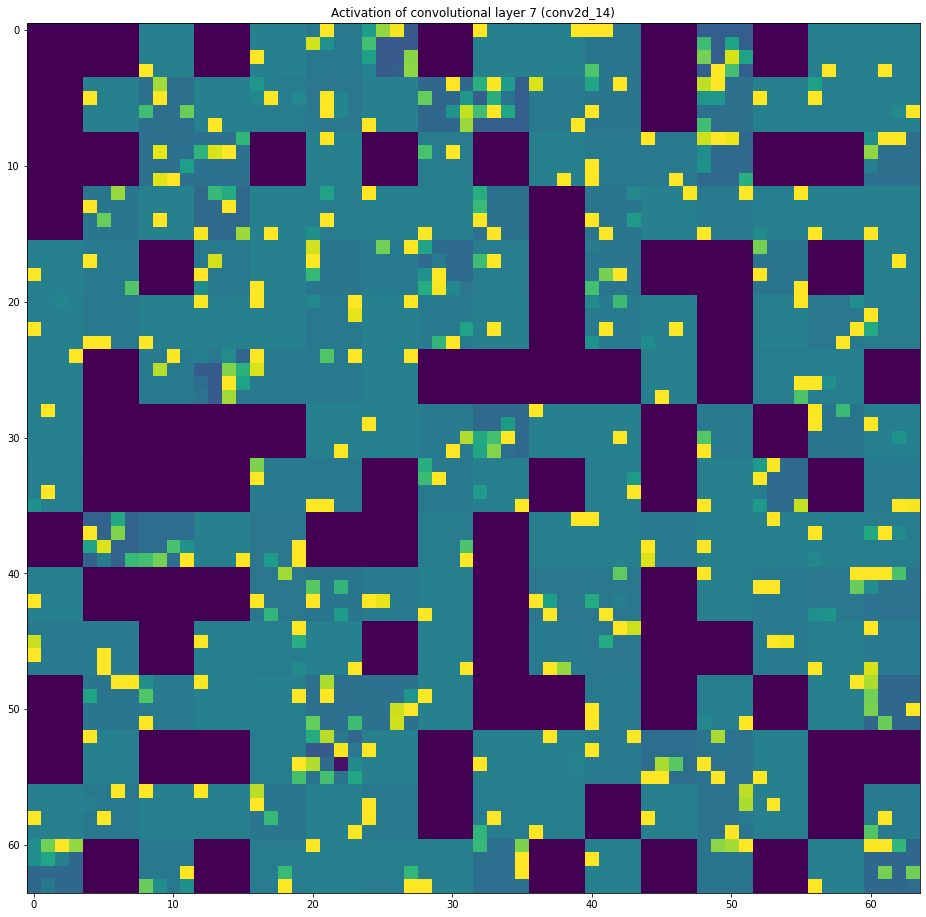

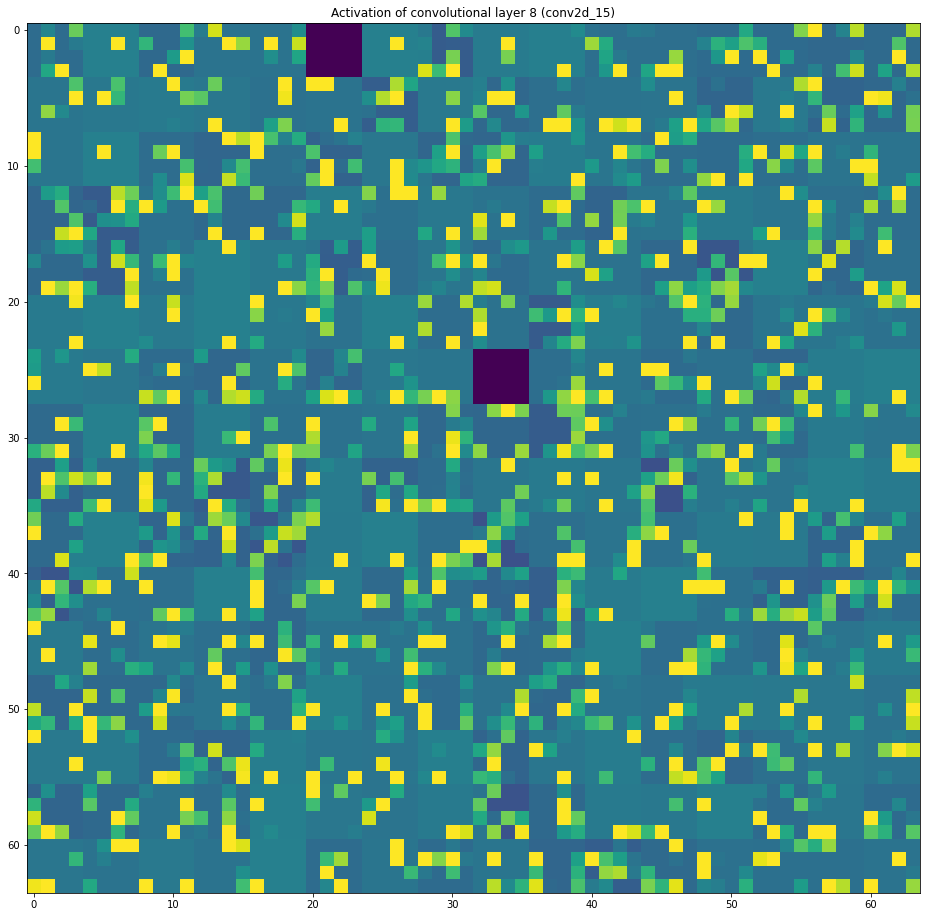

Answer is 499 characters long


In [42]:
# The implementation below is based on the feature maps plotting implementation in
# Lecture 06 - Convolutional Neural Networks and Lab 6 - Convolutional Neural Networks.
from tensorflow.keras import models
from operator import itemgetter 

def plot_activations():
  
  model = load_model_from_file(base_dir, 'model_2_2')

  # Preprocess the image we are going to visualize the activations of
  img_tensor = global_contrast_norm(rgb2gray(X_test),1, 20, 0.00000001)[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 

  # Extracts the outputs of the top 8 layers
  layer_outputs = [layer.output for layer in model.layers[:25]]
  # Creates a model that will return these outputs, given the model input
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

  # This will return a list of 5 Numpy arrays:
  # one array per layer activation
  activations = activation_model.predict(img_tensor)
 
  images_per_row = 16

  layer_names = []
  for layer in model.layers[:25]:
      layer_names.append(layer.name)

  current_index = 1
  # Only visualize the convolutional layers
  index_list = [0,2,6,8,12,14,18,20]

  layers_to_display = list(itemgetter(*index_list)(layer_names)) 
  activations_to_display = list(itemgetter(*index_list)(activations)) 
  # Display our feature maps
  for layer_name, layer_activation in zip(layers_to_display, activations_to_display):
      # This is the number of features in the feature map
      n_features = layer_activation.shape[-1]

      # The feature map has shape (1, size, size, n_features)
      size = layer_activation.shape[1]

      # We will tile the activation channels in this matrix
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      # We'll tile each filter into this big horizontal grid
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title("Activation of convolutional layer {} ({})".format(current_index,layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

      current_index += 1

  plt.show()

plot_activations()

answer_q_3_2 = """
Conv. layers 1 and 2 mainly retain the digit's shape and show various edge
detectors. Layers 3 and 4 are more abstract, but edges still recognizable.
For layer 5 and 6, visually recognizing patterns is difficult: it starts
encoding higher-level concepts belonging to the image's class.
The last 2 activations are extremely abstract. 
Some activations are empty: the filter did not find information
it focuses on. This is mainly for layer 1 and 7, where layer 7 does
not have much to learn anymore.
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

The model predicts: 8


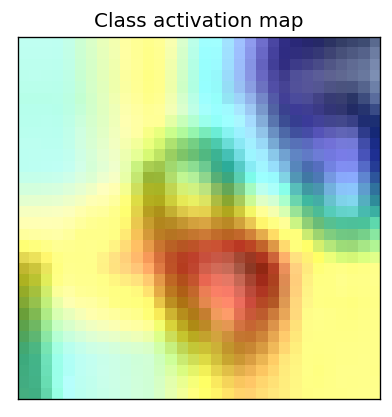

We can see that our model nicely focusses on the center of the image. It focusses more on the bottom side of the digit compared to the top side.


In [43]:
## Based on: https://www.sicara.ai/blog/2019-08-28-interpretability-deep-learning-tensorflow

from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.applications.inception_v3 import preprocess_input
import cv2
# from google.colab.patches import cv2_imshow # cv2.imshow does not work on Google Colab notebooks, which is why we are using cv2_imshow instead

def plot_3_3():
  model = load_model_from_file(base_dir, 'model_2_2')
  image_index = 0

  # Preprocess the image we are going to visualize the activations of
  img = global_contrast_norm(rgb2gray(X_test),1, 20, 0.00000001)

  # Sanity test: do we get the right prediction?
  y_pred = model.predict(img)
  print('The model predicts:', np.argmax(y_pred, axis=1)[image_index]+1)

  # We add a dimension to transform our array into a "batch"
  # of size (1, 224, 224, 3)
  # x = np.expand_dims(img[image_index], axis=0) 

  # Finally we preprocess the batch
  # (this does channel-wise color normalization)
  img = preprocess_input(img)
  img_tensor = image.img_to_array(img[image_index])

  # Retrieve the last convolutional layer in model_2_2
  last_conv_layer = model.get_layer('conv2d_15')

  # Create a graph that outputs target convolution and output
  grad_model = models.Model([model.inputs], [last_conv_layer.output, model.output])

  # Get the score for target class
  with tf.GradientTape() as tape:
      conv_outputs, predictions = grad_model(np.array([img_tensor]))
      loss = predictions[:, 8]

  # Extract filters and gradients
  output = conv_outputs[0]
  grads = tape.gradient(loss, conv_outputs)[0]

  # Average gradients spatially
  weights = tf.reduce_mean(grads, axis=(0, 1))

  # Build a ponderated map of filters according to gradients importance
  cam = np.ones(output.shape[0:2], dtype=np.float32)

  for index, w in enumerate(weights):
      cam += w * output[:, :, index]
  
  # Heatmap visualization (construct Class Activations Maps (CAM))
  cam = cv2.resize(cam.numpy(), (224, 224))
  cam = np.maximum(cam, 0)
  heatmap = (cam - cam.min()) / (cam.max() - cam.min())

  # Set size of image and intensity of the superimposed activation map 
  res = 256
  intensity = 0.5
  
  # Possibility to show original image
  # orig = tf.keras.preprocessing.image.img_to_array(X_test[0]*255)
  # cv2_imshow(cv2.resize(orig, (res, res)))

  original_image = image.img_to_array(X_test[image_index]*255)
  
  # We convert the heatmap to RGB and resize the heatmap to the same size as
  # the original image
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  # Superimpose heatmap over original image with specified intensity
  img = heatmap * intensity + original_image

#   cv2.imshow(cv2.resize(img, (res, res))) #cv2_imshow(cv2.resize(img, (res, res))) cv2_imshow for Google Colab (uncomment import of cv2_imshow)

  img = np.uint8(np.minimum(img, 255))

  plt.rcParams['figure.dpi'] = 120
  plt.imshow(img)
  plt.title('Class activation map')
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_3_3()

print("We can see that our model nicely focusses on the center of the image. It focusses more on the bottom side of the digit compared to the top side.")

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_79 (Dense)             (None, 10)                10250     
Total params: 15,250,250
Trainable params: 13,514,762
Non-trainable params: 1,735,488
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.203617  0.637196  0.312935      0.839743
max  1.064669  0.940970  0.525138      0.911500
Answer is 499 characters long


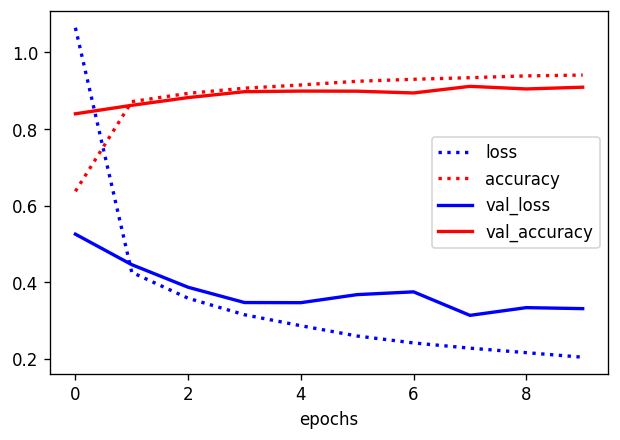

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models, layers

def build_model_4_1():
  conv_base = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
  conv_base.trainable = True

  #Freeze the last 2 blocks
  for layer in conv_base.layers[:-8]:
    layer.trainable = False
  
  # Sanity check whether layers are correctly frozen
  # for layer in conv_base.layers:
  #   print(layer, layer.trainable)

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
  
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=10, batch_size=128)

answer_q_4_1 = """
Completely freezing conv. base (fast-feature extraction) resulted in accuracy of
~60%. Unfreezing only the last layer gave ~20% improvement. The preferred embedding
(accuracy ~91%) was found in finetuning setting by unfreezing the last 2 blocks
(6 conv. layers), balancing model performance and computation time/task complexity.
Adam optimizer lead to most smooth learning compared to RMSprop and SGD. The model
starts overfitting after 10 epochs. Batch size of 128 turned out to be most suitable.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [61]:
import pickle
import gzip

from tensorflow.keras import Model #, models, layers, Input
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.decomposition import PCA

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, 'model_4_1')

  # only use convolutional base
  conv_part = Model(model.inputs, model.layers[-3].output)
  print(conv_part.summary())

  embedding = conv_part.predict(X_train)
  store_embedding(embedding,'X_train')

  embedding = conv_part.predict(X_test)
  store_embedding(embedding,'X_test')

# store_embeddings()

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """

  pca = PCA(n_components=20)
  svm = SVC(C = 1, random_state=0)
  # adaboost = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
  pipe = Pipeline([('pca', pca), ("svm", svm)])
  
  return pipe

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """

  # PREVIOUS APPROACH
  pipeline.fit(X_train, y_train)
  train_accuracy = pipeline.score(X_train, y_train)
  print(f"Train accuracy: {train_accuracy}")
  accuracy = pipeline.score(X_test, y_test)
  print(f"Test accuracy: {accuracy}")

  return accuracy

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  # Retrieve embeddings from file
  X_train_embed = load_embedding("X_train")
  X_test_embed = load_embedding("X_test")

  # Convert label format: binary array of length 10 to digit label
  y_train = np.argmax(y_train,axis=1)
  y_test = np.argmax(y_test,axis=1)

  pipeline = generate_pipeline()
  return evaluate_pipeline(pipeline, X_train_embed, y_train, X_test_embed, y_test)

print(evaluation_4_2(X_train, y_train, X_test, y_test))
print("Pipeline:",generate_pipeline())

answer_q_4_2 = """PCA with 20 components is used to increase generalization and make learning more efficient, losing no more than 0.1% accuracy. SVM, for which Tang (2013) has shown positive results when trained on features extracted by a conv. base, outperformed AdaBoostClassifier and RandomForests.
Adjusting regularization parameters did not lead to any major performance improvement. I did not succeed in beating my best model (~95.8%). Unfreezing more layers of the conv. base can help, but is rather expensive."""
print("Answer is {} characters long".format(len(answer_q_4_2)))

Train accuracy: 0.9593982122623694
Test accuracy: 0.9121260952764629
0.9121260952764629
Pipeline: Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svm',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
